In [1]:
!pip install pyforest

  Preparing metadata (setup.py) ... - \ | done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14606 sha256=d4f70bf0039c999ec157f6c95c99468b7c64676a5a021cec861d05272d2ebfa1
  Stored in directory: /root/.cache/pip/wheels/9e/7d/2c/5d2f5e62de376c386fd3bf5a8e5bd119ace6a9f48f49df6017
Successfully built pyforest


In [2]:
import os
import pyforest

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playstore-dataset/playstore-analysis.csv


In [3]:
data  = pd.read_csv("/kaggle/input/playstore-dataset/playstore-analysis.csv")

data.head(3)

<IPython.core.display.Javascript object>

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [4]:
data.shape


(10841, 13)

In [5]:
# Summary Statistics
data.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


In [6]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

## DATA CLEANING

In [7]:
# Drop specified columns from the DataFrame
data.drop(["App", "Current Ver", "Last Updated", "Current Ver", "Genres"], axis=1, inplace=True)

# Display information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10841 non-null  object 
 1   Rating          9367 non-null   float64
 2   Reviews         10841 non-null  object 
 3   Size            10841 non-null  float64
 4   Installs        10841 non-null  object 
 5   Type            10840 non-null  object 
 6   Price           10841 non-null  object 
 7   Content Rating  10840 non-null  object 
 8   Android Ver     10838 non-null  object 
dtypes: float64(2), object(7)
memory usage: 762.4+ KB


In [8]:
#Drop duplicates

data = data.drop_duplicates(keep = False)

#check length of the dataset to confirm duplicate rows have been deleted
d_l = len(data)
d_l

9875

In [9]:
#find columns with null values and the number of rows with the null values
data.isna().sum()

Category             0
Rating            1391
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Android Ver          3
dtype: int64

In [10]:
#Category column cleaning steps
#1. Find blanks

data[data["Category"].isna()]

#Find the unique values in the column
data["Category"].unique()
#Find the row with a value of 1.9 as category
data.loc[data["Category"] == "1.9"]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
10472,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,NaN


In [11]:
#Drop the row

data.drop(index = 10472, inplace = True)


In [12]:
#Ratings cleaning
#data["Rating"].unique()
print("Max value is: ", data["Rating"].max())
print("Min value is: ", data["Rating"].min())

Max value is:  5.0
Min value is:  1.0


The values fall within the acceptable range for ratings which is between 1 and 5

In [13]:
#data["Rating"].isna().sum()- There are 1393 missing values in the column
#Replace missing values with mode
filler = data["Rating"].mean()
filler = round(filler, 1)
# filler
data["Rating"].fillna(filler, inplace = True)
data["Rating"].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 2.5, 1. , 1.9, 2.9,
       2.8, 2.3, 2.2, 1.7, 2. , 1.8, 2.7, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [14]:
#Reviews Cleaning 
data["Reviews"] = data["Reviews"].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9874 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9874 non-null   object 
 1   Rating          9874 non-null   float64
 2   Reviews         9874 non-null   int64  
 3   Size            9874 non-null   float64
 4   Installs        9874 non-null   object 
 5   Type            9873 non-null   object 
 6   Price           9874 non-null   object 
 7   Content Rating  9874 non-null   object 
 8   Android Ver     9872 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 771.4+ KB


In [15]:
#Find null values in the column
data["Reviews"].isna().sum()

0

There are no null values in the column Reviews

In [16]:
#Find blanks int the Size column
data["Size"].isna().sum()

0

There are no null values in the column Size

In [17]:
# CLeaning the Installs Column
data["Installs"].isna().sum()

0

Theer are no null values in the column Installs

In [18]:
# Remove the '+' at the end and convert to integer
data["Installs"] = pd.to_numeric(data["Installs"].str.replace(r'\D', '', regex=True))
data["Installs"].unique()

<IPython.core.display.Javascript object>

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [19]:
# Cleaning the Type column
# data[data["Type"].isna()]   #find the index of the row with the missing value
# data.drop(index = 9148, inplace = True) #Drop the row 
data["Type"].unique()

array(['Free', 'Paid', nan], dtype=object)

In [20]:
#Cleaning the Price Column
#Remove $ and convert to float
data["Price"] = pd.to_numeric(data["Price"].str.replace('$', ''))
data["Price"].unique()

<IPython.core.display.Javascript object>

array([  0.  ,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,   4.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   1.  ,   2.49,  10.99,
         1.5 ,  14.99,  15.99,  74.99,  39.99,   3.95,  29.99,   4.49,
         1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,  17.99, 400.  ,
         3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,  19.99,   1.59,
         6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,  18.99,
       389.99,  19.9 ,   8.49,   1.75,  11.99,  14.  ,   4.85,  46.99,
         5.49, 109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,
         3.9 ,   4.59,  15.46,  10.  ,   3.04,  12.99,   4.29,   2.6 ,
         3.28,   4.6 ,  28.99,   2.95,   2.9 ,   1.97,  24.99, 200.  ,
        89.99,   2.56,  30.99,   3.61, 394.99,   1.26,  16.99,   1.2 ,
         1.04])

In [21]:
# #Cleaning the Android Version column
data[data["Android Ver"].isna()] #fnd indices for ros with missing values
indices = [4453, 4490] #pass the index values to a list
data.drop(indices, inplace = True)   # Drop the rows based on the index values
data["Android Ver"].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [22]:
data["Android Ver"] = data["Android Ver"].str.replace('and up', '')
data["Android Ver"] = data["Android Ver"].str.replace('W', '')
data["Android Ver"].unique()

array(['4.0.3 ', '4.2 ', '4.4 ', '2.3 ', '3.0 ', '4.1 ', '4.0 ', '2.3.3 ',
       'Varies with device', '2.2 ', '5.0 ', '6.0 ', '1.6 ', '1.5 ',
       '2.1 ', '7.0 ', '5.1 ', '4.3 ', '4.0.3 - 7.1.1', '2.0 ', '3.2 ',
       '7.1 ', '7.0 - 7.1.1', '8.0 ', '5.0 - 8.0', '3.1 ', '2.0.1 ',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 ', '2.2 - 7.1.1', '5.0 - 7.1.1'],
      dtype=object)

In [23]:
data["Android Ver"].mode()

0    4.1 
Name: Android Ver, dtype: object

## DATA ANALYSIS AND VISUALIZATION

In [24]:
data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
0,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,4.0.3
1,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,4.0.3
2,ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,4.0.3
3,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,4.2
4,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,4.4


In [25]:
#No of unique categories in the dataset
data.Category.nunique()

33

In [26]:
#for decorating plots
plt.style.use('ggplot')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

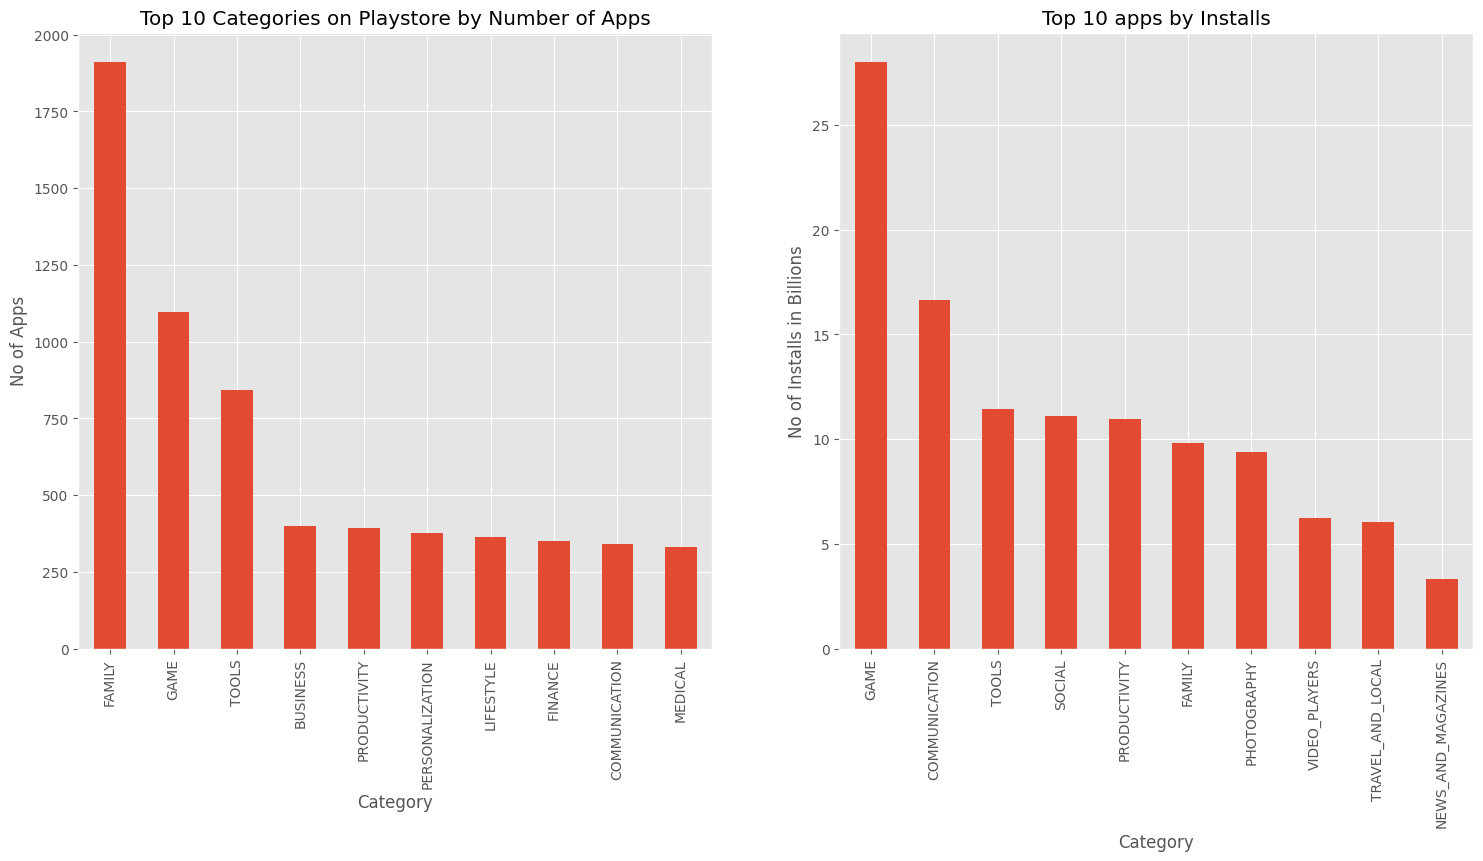

In [27]:
#Create a figure and add two plots  side-by-side
fig = plt.figure(figsize = [18,8])
ax0 = fig.add_subplot(1,2,1) #-> First plot on the left
ax1 = fig.add_subplot(1,2,2) #->Second plot on the right
#First plot
#Find the categories with the most apps on playstore
top_10 = (data['Category'].value_counts()).iloc[:10]
#create bar chart to visualize them
top_10.plot(ax = ax0, kind='bar', 
            ylabel="No of Apps",
            title ="Top 10 Categories on Playstore by Number of Apps")
plt.xlabel("Category")


#Second Plot
#get total installs per category and divide by a Billion for easier visualization
totals = data.groupby("Category")["Installs"].sum()/1000000000
#sorting in descending order and getting the top ten values
totals = totals.sort_values(ascending = False).head(10)
#Visualization
totals.plot(ax = ax1, kind = 'bar', title = "Top 10 apps by Installs")
plt.xlabel("Category")
plt.ylabel("No of Installs in Billions")
fig.show()

The Games category has the most installed apps in terms of Installs while the Family category has the most number of apps on playstore

In [28]:
#Pass the top categories in terms of installs to a list
categories = totals.index.to_list()
categories

['GAME',
 'COMMUNICATION',
 'TOOLS',
 'SOCIAL',
 'PRODUCTIVITY',
 'FAMILY',
 'PHOTOGRAPHY',
 'VIDEO_PLAYERS',
 'TRAVEL_AND_LOCAL',
 'NEWS_AND_MAGAZINES']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Rating')

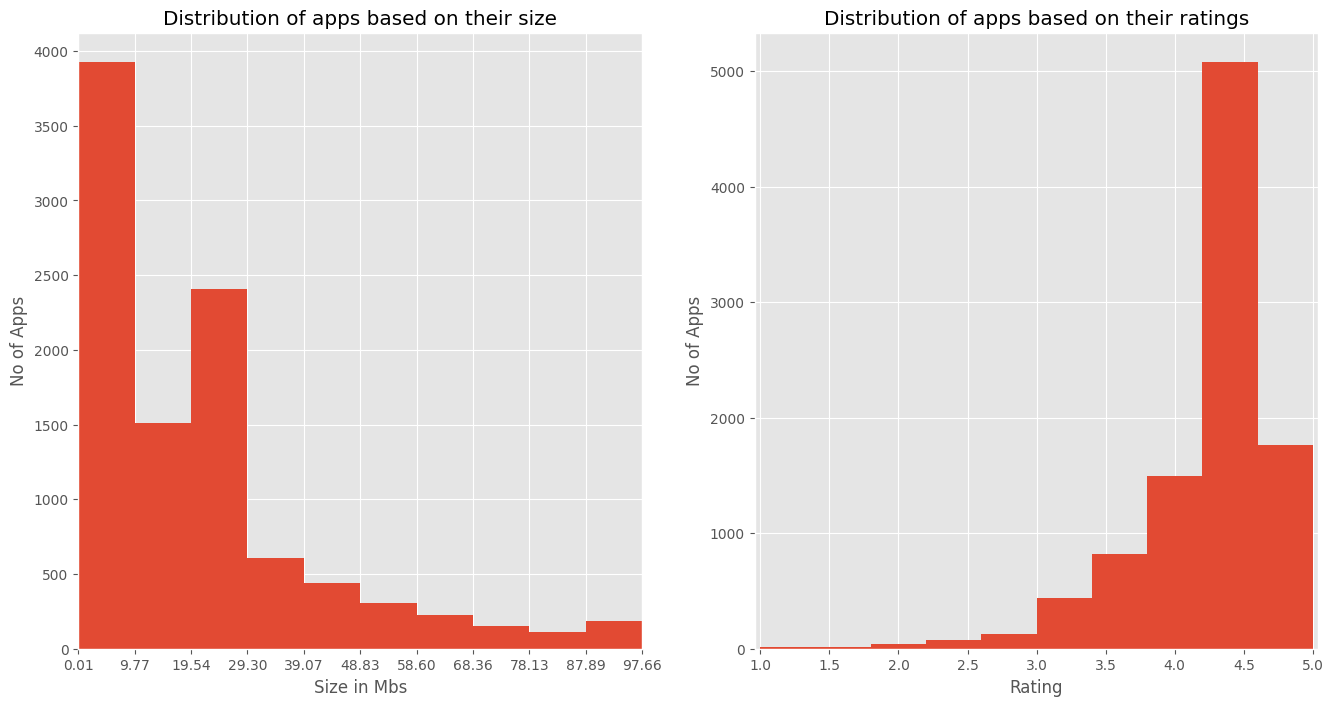

In [29]:
#Create a figure and add two plots  side-by-side
fig = plt.figure(figsize = [16,8])
ax0 = fig.add_subplot(1,2,1) #-> First plot on the left
ax1 = fig.add_subplot(1,2,2) #->Second plot on the right

#First Histogram on the left
df = data
df["Size"] = df["Size"]/1024

count, bin_edges = np.histogram(df["Size"])
xmin = bin_edges[0]  #  first bin value 
xmax = bin_edges[-1]#  last bin value 


df["Size"].plot(ax = ax0, kind="hist",
                title = "Distribution of apps based on their size",
#                 bins = 10,
                xticks=bin_edges,
                xlim=(xmin, xmax),
                xlabel="Size in Mbs",
                ylabel="No of Apps")

#Second Histogram on the right
data["Rating"].plot(ax = ax1, 
                    kind = "hist", 
                    title ="Distribution of apps based on their ratings",
                    ylabel="No of Apps")
plt.margins(x=0.01)      #->x-axis to start at 0
plt.xlabel("Rating")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

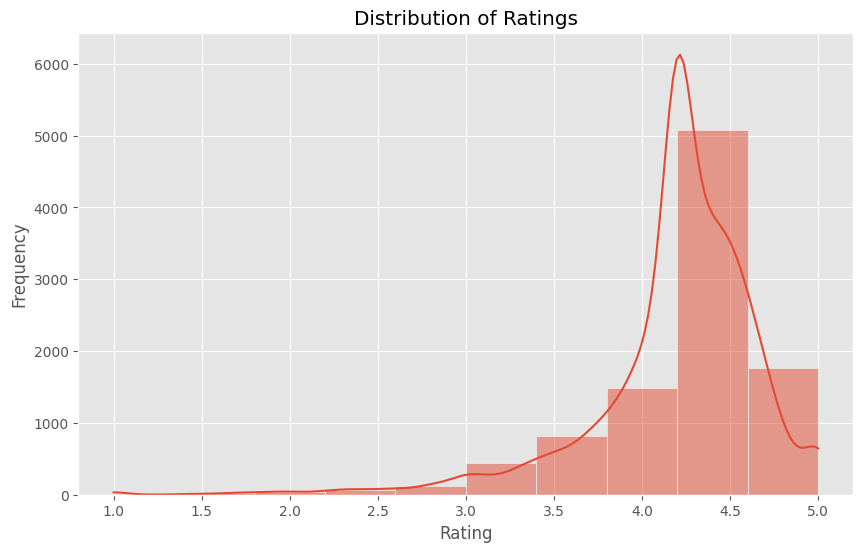

In [30]:
# Distribution of Ratings using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

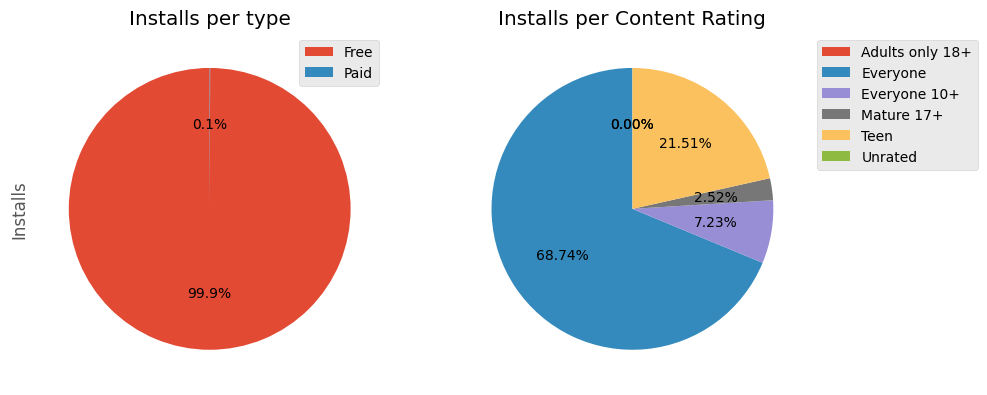

In [31]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1) #-> First plot on the left
ax1 = fig.add_subplot(1,2,2) #->Second plot on the right
#First plot
df_in = data.groupby("Type")["Installs"].sum()
 
df_in.plot(ax=ax0, kind="pie", 
           title = "Installs per type", 
           figsize = [10,6], 
           labeldistance = None,
           startangle=90,
           ylabel=(None),
           autopct='%1.1f%%')
ax0.legend(bbox_to_anchor=(0.5, 0, 0.5, 1))

#Second plot
cr_in = data.groupby("Content Rating")["Installs"].sum()
 
cr_in.plot(ax=ax1, kind="pie", 
           figsize = [10,6], 
           labeldistance = None, 
           startangle=90, 
           autopct='%1.2f%%')

plt.title("Installs per Content Rating")
plt.ylabel(None)
plt.legend(bbox_to_anchor=(1, 0, 0.5, 1))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

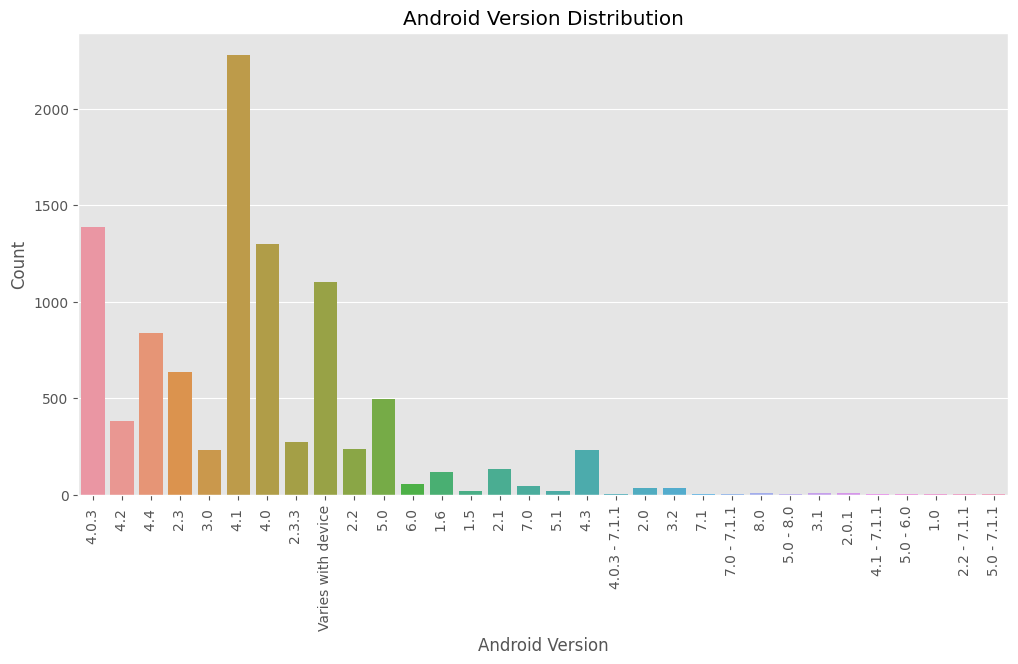

In [32]:
# Android Version Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Android Ver')
plt.title('Android Version Distribution')
plt.xlabel('Android Version')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()